In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
chemblpath = 'chembl_35_sqlite/chembl_35.db' #path must be modified accordingly
connection = sqlite3.connect(chemblpath)

In [2]:
results = pd.read_csv('chembl_35_broad_results_processed.txt', sep='\t')

In [3]:
results.head()

,assay_id,year,description,assay_type,predicted_category,prediction_score,predicted_bao_id,predicted_bao_term,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity
0,89,1994.0,Evaluated for its activity to inhibit rat live...,B,Protein activity,0.820549,BAO_0013016,functional target-based,0.000141,0.020719,0.820549,0.000340,0.000403,0.000183,0.004031
1,235,2003.0,Inhibitory activity against inosine 5'-inosine...,B,Protein activity,0.760096,BAO_0013016,functional target-based,0.000047,0.000101,0.760096,0.000034,0.368850,0.000012,0.003083
2,667,2003.0,5-hydroxytryptamine 1A receptor antagonism was...,F,Radioligand binding,0.749272,BAO_0002776,radioligand binding assay,0.749272,0.003896,0.000237,0.000165,0.005068,0.005397,0.000072
3,758,2001.0,Binding affinity towards human 5-hydroxytrypta...,B,Binding,0.999711,BAO_0002989,binding assay,0.001450,0.999711,0.000007,0.000063,0.000013,0.000615,0.000136
4,1155,1992.0,Compound was evaluated for in vitro binding af...,B,Radioligand binding,0.999998,BAO_0002776,radioligand binding assay,0.999998,0.000010,0.000030,0.001088,0.000005,0.000031,0.000692


In [4]:
len(results)

1169293

In [5]:
len(results['assay_id'].drop_duplicates())

1169293

In [6]:
high_conf = results.loc[results['prediction_score'] > 0.7]

In [7]:
len(high_conf)

1047718

In [8]:
len(high_conf) / len(results)

0.896026915409568

In [9]:
categories = ['Radioligand binding (BAO_0002776)', 'Binding (BAO_0002989)',
       'Protein activity (BAO_0013016)', 'in vivo method (BAO_0040021)',
       'Cell phenotype (BAO_0002542)', 'Nucleic acid binding',
       'Antimicrobial activity']

In [10]:
results['scores total']= results[categories].sum(axis=1)

In [11]:
results.head()

,assay_id,year,description,assay_type,predicted_category,prediction_score,predicted_bao_id,predicted_bao_term,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,scores total
0,89,1994.0,Evaluated for its activity to inhibit rat live...,B,Protein activity,0.820549,BAO_0013016,functional target-based,0.000141,0.020719,0.820549,0.000340,0.000403,0.000183,0.004031,0.846365
1,235,2003.0,Inhibitory activity against inosine 5'-inosine...,B,Protein activity,0.760096,BAO_0013016,functional target-based,0.000047,0.000101,0.760096,0.000034,0.368850,0.000012,0.003083,1.132223
2,667,2003.0,5-hydroxytryptamine 1A receptor antagonism was...,F,Radioligand binding,0.749272,BAO_0002776,radioligand binding assay,0.749272,0.003896,0.000237,0.000165,0.005068,0.005397,0.000072,0.764107
3,758,2001.0,Binding affinity towards human 5-hydroxytrypta...,B,Binding,0.999711,BAO_0002989,binding assay,0.001450,0.999711,0.000007,0.000063,0.000013,0.000615,0.000136,1.001993
4,1155,1992.0,Compound was evaluated for in vitro binding af...,B,Radioligand binding,0.999998,BAO_0002776,radioligand binding assay,0.999998,0.000010,0.000030,0.001088,0.000005,0.000031,0.000692,1.001855


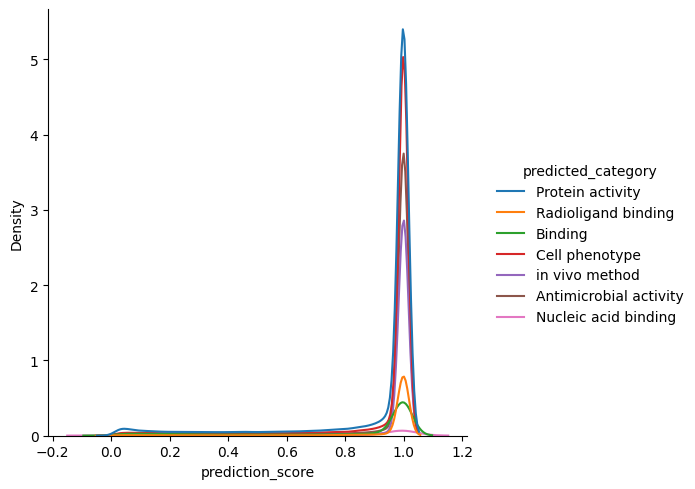

In [14]:
sns.displot(results, x="prediction_score", kind='kde', hue="predicted_category")

In [17]:
proportions = pd.DataFrame(high_conf['predicted_category'].value_counts(normalize=True).apply(lambda x: x*100))
proportions

,proportion
predicted_category,
Protein activity,31.286281
Cell phenotype,25.157533
Antimicrobial activity,18.928758
in vivo method,14.251163
Binding,4.698593
Radioligand binding,4.559624
Nucleic acid binding,1.118049


In [18]:
proportions['proportion'] = proportions['proportion'].apply(lambda x: float("{0:.3g}".format(x)))

In [19]:
proportions

,proportion
predicted_category,
Protein activity,31.30
Cell phenotype,25.20
Antimicrobial activity,18.90
in vivo method,14.30
Binding,4.70
Radioligand binding,4.56
Nucleic acid binding,1.12


In [20]:
len(high_conf)

1047718

/tmp/ipykernel_2933544/180353301.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


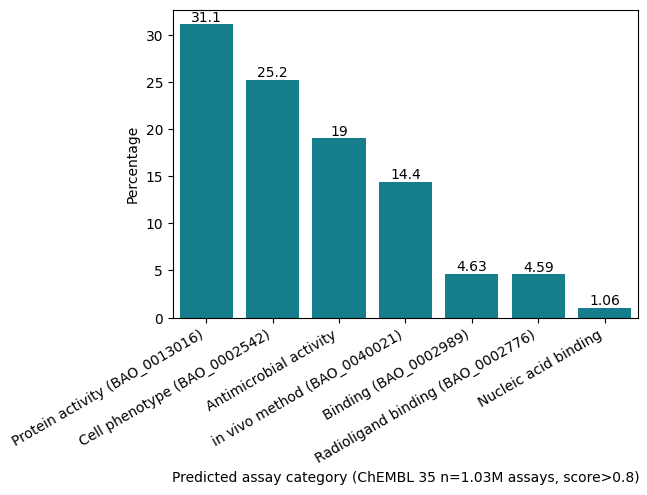

In [59]:
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(proportions, x="predicted_cat", y="proportion", color='#028ca1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_xlabel('Predicted assay category (ChEMBL 35 n=1.03M assays, score>0.8)')
ax.set_ylabel('Percentage')
for i in ax.containers:
    ax.bar_label(i,)

fig.savefig("results/chembl_35/chembl_35_broad_category_predictions_barp.png", bbox_inches = "tight")

In [26]:
training_data = pd.read_csv('data/dataset_counts.csv')
training_data = training_data.iloc[:7]

In [27]:
proportions.index

Index(['Protein activity (BAO_0013016)', 'Cell phenotype (BAO_0002542)',
       'Antimicrobial activity', 'in vivo method (BAO_0040021)',
       'Binding (BAO_0002989)', 'Radioligand binding (BAO_0002776)',
       'Nucleic acid binding'],
      dtype='object', name='predicted_cat')

In [28]:
training_data['broad_category'] = ['Nucleic acid binding'
                                   , 'Protein activity (BAO_0013016)'
                                   , 'Binding (BAO_0002989)'
                                   , 'Radioligand binding (BAO_0002776)'
                                   , 'Cell phenotype (BAO_0002542)'
                                   , 'Antimicrobial activity'
                                   , 'in vivo method (BAO_0040021)'
                                  ]

In [29]:
sum(training_data['count'])

863

In [30]:
training_data['percentage'] = (training_data['count'] / 863) * 100

In [31]:
training_data['percentage'] = training_data['percentage'].apply(lambda x: float("{0:.3g}".format(x)))

In [32]:
training_data

,label,bao_preferred_term,bao_id,count,broad_category,percentage
0,Nucleic acid binding,NaN,No suitable ID at present,176,Nucleic acid binding,20.4
1,Protein activity,functional target-based,BAO_0013016,171,Protein activity (BAO_0013016),19.8
2,"Binding affinity, displacement, competition",binding assay,BAO_0002989,134,Binding (BAO_0002989),15.5
3,"Radioligand competition, displacement, binding",radioligand binding assay,BAO_0002776,118,Radioligand binding (BAO_0002776),13.7
4,Cell phenotype,cell phenotype,BAO_0002542,113,Cell phenotype (BAO_0002542),13.1
5,Antimicrobial activity,NaN,No suitable ID at present,88,Antimicrobial activity,10.2
6,in vivo method,in vivo assay method,BAO_0040021,63,in vivo method (BAO_0040021),7.3


/tmp/ipykernel_2933544/4027707288.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


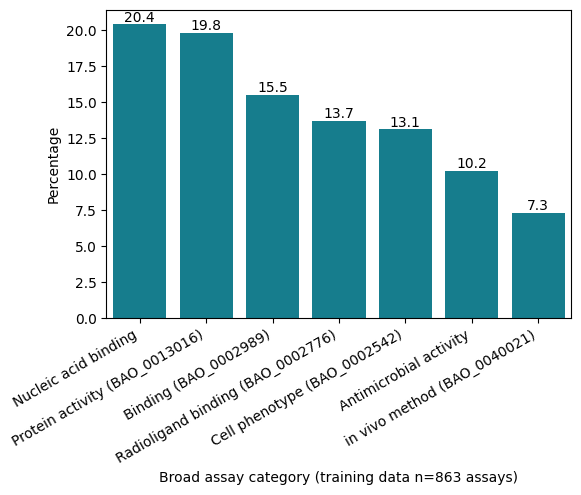

In [33]:
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(training_data, x="broad_category", y="percentage", color='#028ca1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_xlabel('Broad assay category (training data n=863 assays)')
ax.set_ylabel('Percentage')
for i in ax.containers:
    ax.bar_label(i,)

fig.savefig("data/dataset_barp.png", bbox_inches = "tight")

In [34]:
results['predicted_cat'].drop_duplicates()

0         Protein activity (BAO_0013016)
2      Radioligand binding (BAO_0002776)
3                  Binding (BAO_0002989)
21          Cell phenotype (BAO_0002542)
33          in vivo method (BAO_0040021)
41                Antimicrobial activity
147                 Nucleic acid binding
Name: predicted_cat, dtype: object

In [36]:
full_results = pd.read_csv('chembl_35_broad_results.txt', sep='\t')

In [37]:
full_results.loc[full_results['assay_id']==1632321]['description'].values[0]

'Antidiabetic activity in C57BL/6 mouse administered 60 mins via oral gavage prior to dextrose challenge measured up to 120 mins post dextrose challenge by oGTT'

In [38]:
full_results.loc[full_results['assay_id']==1632321]['cats'].values[0]

"{'Radioligand binding (BAO_0002776)': 0.00022711393830832094, 'Binding (BAO_0002989)': 0.0007832383853383362, 'Protein activity (BAO_0013016)': 0.00029104741406627, 'in vivo method (BAO_0040021)': 0.0015845169546082616, 'Cell phenotype (BAO_0002542)': 0.00023287216026801616, 'Nucleic acid binding': 0.0015663839876651764, 'Antimicrobial activity': 0.0005206073401495814}"

In [39]:
pd.set_option('display.max_colwidth', 200)

In [40]:
results[results['prediction_score']<0.02]

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score,scores total
70,32742,1997.0,In vitro antagonism against Alpha-1D adrenergic receptor using phenylephrine (PE) challenge in rat aorta,F,0.001057,0.018775,0.013034,7.526948e-04,0.004209,0.000296,0.007932,Binding (BAO_0002989),0.018775,0.013034,0.046056
304,68405,2002.0,"Effective concentration against gamma-aminobutyric acid (GABA) A receptor, alpha 3",B,0.008046,0.006428,0.009453,4.905359e-04,0.010028,0.001768,0.001130,Cell phenotype (BAO_0002542),0.010028,0.009453,0.037344
313,66616,1985.0,Ability to support the growth of Escherichia coli strain AN193 from 50 uM stock solution was determined in growth response assay; No growth around disc,F,0.000095,0.012515,0.003910,3.586315e-04,0.002692,0.008538,0.007201,Binding (BAO_0002989),0.012515,0.008538,0.035310
490,88457,1991.0,Concentration required to reduce the viability of Human B-lymphoblast Raji cells,F,0.000320,0.001585,0.003447,7.140907e-07,0.008247,0.003232,0.000143,Cell phenotype (BAO_0002542),0.008247,0.003447,0.016975
530,102011,2002.0,Tested for the inhibitory concentration against cell growth of RPM18226 multiple myeloma using MTT assay,F,0.014487,0.000150,0.008264,2.397963e-05,0.000776,0.000027,0.001779,Radioligand binding (BAO_0002776),0.014487,0.008264,0.025507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165886,1852198,2019.0,Inhibition of mTORC1 in human RD cells assessed as reduction in P70S6K1 phosphorylation at Thr 389 site at 20 uM incubated for 2 hrs in presence of insulin by Western blot analysis,B,0.012425,0.000015,0.008510,9.321488e-05,0.002103,0.002693,0.000095,Radioligand binding (BAO_0002776),0.012425,0.008510,0.025933
1166173,1898108,2019.0,Disruption of mitochondrial membrane potential in human MCF7 cells assessed as shift of fluorescence from red to green by JC1 staining based fluorescent microscopic method,F,0.000542,0.001285,0.012082,2.191385e-03,0.000288,0.001836,0.000305,Protein activity (BAO_0013016),0.012082,0.002191,0.018530
1167198,927597,2004.0,Neuroblocking potency in Periplaneta americana (American cockroach) admoninal central nerve cod,F,0.009455,0.000658,0.000262,1.483504e-04,0.011307,0.014418,0.007656,Nucleic acid binding,0.014418,0.011307,0.043906
1167379,1335912,2014.0,Inhibition of mouse 3T3L1 cell differentiation assessed as reduction in PPARgamma protein level after 8 days by immunoblotting,F,0.001019,0.000001,0.000724,9.046591e-03,0.004949,0.000354,0.000451,in vivo method (BAO_0040021),0.009047,0.004949,0.016545


In [60]:
results.loc[results['prediction_score']>0.5]

,assay_id,year,description,assay_type,predicted_cat,prediction_score
0,89,1994.0,Evaluated for its activity to inhibit rat live...,B,Protein activity (BAO_0013016),0.820549
1,235,2003.0,Inhibitory activity against inosine 5'-inosine...,B,Protein activity (BAO_0013016),0.760096
2,667,2003.0,5-hydroxytryptamine 1A receptor antagonism was...,F,Radioligand binding (BAO_0002776),0.749272
3,758,2001.0,Binding affinity towards human 5-hydroxytrypta...,B,Binding (BAO_0002989),0.999711
4,1155,1992.0,Compound was evaluated for in vitro binding af...,B,Radioligand binding (BAO_0002776),0.999998
...,...,...,...,...,...,...
1169288,2352167,2023.0,Induction of autophagy in human HCT-116 cells ...,F,Cell phenotype (BAO_0002542),0.999881
1169289,2365738,2023.0,Antifungal activity against Candida albicans C...,F,in vivo method (BAO_0040021),0.999984
1169290,2314685,2023.0,Induction of apoptosis in human MCF7 cells ass...,F,Cell phenotype (BAO_0002542),0.999993
1169291,2378790,2023.0,Antifungal activity against multidrug-resistan...,F,Antimicrobial activity,0.999985


In [41]:
# % of data with prediction score > 0.5
len(results.loc[results['prediction_score']>0.5]) / (len(results))

0.9238745122052385

In [42]:
# % of data with prediction score > 0.8
len(results.loc[results['prediction_score']>0.8]) / (len(results))

0.8778706449110701

#### New assays in ChEMBL 35

In [44]:
query1 = """select distinct
assay_id
from 
chembl_35.assays assays
join chembl_35.target_dictionary td on assays.tid = td.tid
where
assays.src_id = 1
and td.tid != 22226
and description is not NULL
and assay_type in ('B', 'F')
and assay_id not in (select distinct assay_id from chembl_34.assays)"""

In [ ]:
assays = pd.read_sql_query(query1, connection)

In [46]:
assays.head()

,assay_id
0,2323817
1,2323818
2,2323820
3,2323821
4,2323822


In [47]:
len(assays)

48582

In [48]:
results_new_35 = results.loc[results['assay_id'].isin(assays['assay_id'])]

In [49]:
results_new_35.head()

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score,scores total
8945,2323830,2023.0,Inhibition of quorum sensing system in Pseudomonas aeruginosa PAO1 transfected with pqsA-gfp reporter assessed as inhibition of fluorescence expression incubated for >=12 hrs by microplate reader ...,B,0.000193,0.000023,0.999631,0.000074,1.057584e-05,0.002584,0.000087,Protein activity (BAO_0013016),0.999631,0.002584,1.002602
8946,2326009,2023.0,Inhibition of N-terminal His6-tagged recombinant full length SARS-CoV-2 3CLpro expressed in Escherichia coli BL21(DE3) using (KTSAVLQSGFRKME) as fluorogenic substrate preincubated with compound fo...,B,0.000066,0.000016,0.999978,0.000003,2.628876e-06,0.000132,0.000057,Protein activity (BAO_0013016),0.999978,0.000132,1.000254
8947,2319039,2023.0,Induction of cell cycle arrest in mouse BaF3 cells harbouring JAK2 V671F mutant assessed as accumulation of cells at S phase at 2 nM incubated for 24 hrs by propidium iodide staining based flow cy...,F,0.000462,0.000090,0.000556,0.000254,9.989636e-01,0.000108,0.000060,Cell phenotype (BAO_0002542),0.998964,0.000556,1.000494
8948,2323155,2023.0,Inhibition of SLK (unknown origin) at 10 uM by ADP-Glo assay,B,0.000053,0.000006,0.999996,0.000004,1.362061e-06,0.000033,0.000033,Protein activity (BAO_0013016),0.999996,0.000053,1.000126
8949,2323163,2023.0,Inhibition of TYK2 (unknown origin) at 10 uM by ADP-Glo assay,B,0.000025,0.000003,0.999984,0.000006,9.392776e-07,0.000022,0.000033,Protein activity (BAO_0013016),0.999984,0.000033,1.000074


In [51]:
new_35_high_conf = results_new_35.loc[results_new_35['prediction_score'] > 0.8]

In [52]:
counts_new_35 = pd.DataFrame(new_35_high_conf['predicted_cat'].value_counts())
counts_new_35

,count
predicted_cat,
Protein activity (BAO_0013016),14448
Cell phenotype (BAO_0002542),13436
Antimicrobial activity,7773
in vivo method (BAO_0040021),4793
Binding (BAO_0002989),2460
Radioligand binding (BAO_0002776),530
Nucleic acid binding,382


In [60]:
len(new_35_high_conf)

43822

/tmp/ipykernel_2933544/4218743380.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


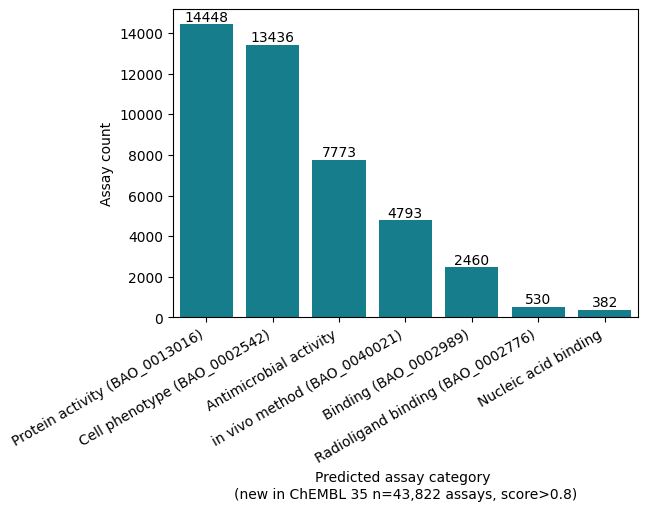

In [61]:
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(counts_new_35, x="predicted_cat", y="count", color='#028ca1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_xlabel('Predicted assay category \n(new in ChEMBL 35 n=43,822 assays, score>0.8)')
ax.set_ylabel('Assay count')
for i in ax.containers:
    ax.bar_label(i,)

fig.savefig("results/chembl_35/chembl_35_broad_category_new_predictions_barp.png", bbox_inches = "tight")

In [55]:
results_new_35.loc[results_new_35['prediction_score']>0.8]

,assay_id,year,description,assay_type,Radioligand binding (BAO_0002776),Binding (BAO_0002989),Protein activity (BAO_0013016),in vivo method (BAO_0040021),Cell phenotype (BAO_0002542),Nucleic acid binding,Antimicrobial activity,predicted_cat,prediction_score,second_largest_score,scores total
8945,2323830,2023.0,Inhibition of quorum sensing system in Pseudomonas aeruginosa PAO1 transfected with pqsA-gfp reporter assessed as inhibition of fluorescence expression incubated for >=12 hrs by microplate reader ...,B,0.000193,0.000023,9.996306e-01,0.000074,1.057584e-05,2.583622e-03,0.000087,Protein activity (BAO_0013016),0.999631,0.002584,1.002602
8946,2326009,2023.0,Inhibition of N-terminal His6-tagged recombinant full length SARS-CoV-2 3CLpro expressed in Escherichia coli BL21(DE3) using (KTSAVLQSGFRKME) as fluorogenic substrate preincubated with compound fo...,B,0.000066,0.000016,9.999784e-01,0.000003,2.628876e-06,1.316433e-04,0.000057,Protein activity (BAO_0013016),0.999978,0.000132,1.000254
8947,2319039,2023.0,Induction of cell cycle arrest in mouse BaF3 cells harbouring JAK2 V671F mutant assessed as accumulation of cells at S phase at 2 nM incubated for 24 hrs by propidium iodide staining based flow cy...,F,0.000462,0.000090,5.559275e-04,0.000254,9.989636e-01,1.081034e-04,0.000060,Cell phenotype (BAO_0002542),0.998964,0.000556,1.000494
8948,2323155,2023.0,Inhibition of SLK (unknown origin) at 10 uM by ADP-Glo assay,B,0.000053,0.000006,9.999959e-01,0.000004,1.362061e-06,3.308420e-05,0.000033,Protein activity (BAO_0013016),0.999996,0.000053,1.000126
8949,2323163,2023.0,Inhibition of TYK2 (unknown origin) at 10 uM by ADP-Glo assay,B,0.000025,0.000003,9.999844e-01,0.000006,9.392776e-07,2.228092e-05,0.000033,Protein activity (BAO_0013016),0.999984,0.000033,1.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169288,2352167,2023.0,Induction of autophagy in human HCT-116 cells assessed as upregulation of Beclin-1 protein expression at 0.5 uM incubated for 48 hrs by Western blot analysis,F,0.000088,0.000014,3.146508e-05,0.000080,9.998814e-01,1.670644e-06,0.000018,Cell phenotype (BAO_0002542),0.999881,0.000088,1.000113
1169289,2365738,2023.0,Antifungal activity against Candida albicans CAAL28 infected in BALB/c mouse candidiasis model assessed as animal survival pre-infected for 1 hr followed by compound addition at 10 mg/kg administe...,F,0.000007,0.000019,8.426130e-07,0.999984,4.064137e-05,8.490584e-06,0.000022,in vivo method (BAO_0040021),0.999984,0.000041,1.000082
1169290,2314685,2023.0,Induction of apoptosis in human MCF7 cells assessed as decrease in Bcl-2 level at 4 to 8 uM incubated for 2 days by immunoblot analysis,F,0.000023,0.000003,2.388970e-06,0.000014,9.999934e-01,8.856131e-08,0.000005,Cell phenotype (BAO_0002542),0.999993,0.000023,1.000042
1169291,2378790,2023.0,Antifungal activity against multidrug-resistant Candida auris 381 assessed as inhibition in fungal growth incubated for 48 hrs in presence of 5% serum by microplate reader analysis,F,0.000040,0.000029,1.073403e-05,0.000083,1.135357e-05,2.498348e-06,0.999985,Antimicrobial activity,0.999985,0.000083,1.000161


In [56]:
# % of assays with prediction score > 0.8
len(results_new_35.loc[results_new_35['prediction_score']>0.8]) / (len(results_new_35))

0.9020213247704911